In [ ]:
import pandas as pd

#Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Linear Algebra
import numpy as np
from numpy import mean
 
#Import Datetime module
from datetime import datetime

from sklearn.model_selection import RepeatedStratifiedKFold, KFold,StratifiedKFold,GridSearchCV,RandomizedSearchCV, train_test_split #For splitting

#Evaluation Metrics
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

#To ignore unnecessary warnings
import warnings

from sklearn.preprocessing import LabelEncoder,OneHotEncoder # for encoding categorical variables


In [ ]:
import tensorflow as tf

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.1 MB/s 


In [ ]:
!pip install optuna

     |████████████████████████████████| 308 kB 5.0 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 209 kB 44.8 MB/s 
     |████████████████████████████████| 75 kB 4.4 MB/s 
     |████████████████████████████████| 112 kB 47.2 MB/s 
     |████████████████████████████████| 149 kB 67.1 MB/s 
     |████████████████████████████████| 49 kB 5.8 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=85c4c48936e57686deb2f8a47d4ad8ea2f998e8dcbb6e96587250edf73acb3c6
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
import catboost as ctb
import lightgbm as ltb
from xgboost import XGBClassifier

In [ ]:
data = pd.read_csv('/content/sample_data/EPL_Data.csv',parse_dates=['Date'])

In [ ]:
data

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,Max>2.5,Max<2.5,Avg>2.5,Avg<2.5,MaxAHH,MaxAHA,AvgAHH,AvgAHA,Year,Month,day,home_standev,home_var,away_standev,away_var,draw_standev,draw_var
0,2020-08-08,Club Brugge,Charleroi,0.0,1.0,0,0.0,0.0,D,1.50,3.8,2.00,1.50,3.00,2.00,1.53,3.00,2.00,1.53,3.15,2.06,1.50,3.00,2.00,1.530000,4.000000,2.050000,1.59,3.24,2.10,1.52,3.07,2.01,2.00,1.99,1.91,1.87,2.02,1.97,1.94,1.89,2020.0,8.0,8.0,0.029761,0.000886,0.038079,0.001450,0.171277,0.029336
1,2020-08-08,Antwerp,Mouscron,1.0,1.0,1,0.0,0.0,D,1.30,3.1,2.00,1.30,3.00,2.00,1.33,3.00,2.00,1.32,3.15,2.06,1.29,3.00,2.00,2.611007,3.886275,3.795705,1.37,3.24,2.10,1.31,3.07,2.01,1.78,1.64,1.68,1.57,1.83,1.90,1.99,1.84,2020.0,8.0,8.0,0.023905,0.000571,0.038079,0.001450,0.071913,0.005171
2,2020-08-08,Standard,Cercle Brugge,1.0,0.0,2,0.0,0.0,D,1.40,3.1,2.00,1.40,3.00,2.00,1.43,3.00,2.00,1.43,3.15,2.06,1.40,3.00,2.00,1.440000,3.100000,2.050000,1.50,3.24,2.10,1.43,3.07,2.01,1.78,1.64,1.69,1.57,2.06,1.90,1.98,1.85,2020.0,8.0,8.0,0.033139,0.001098,0.038079,0.001450,0.071913,0.005171
3,2020-09-08,St Truiden,Gent,2.0,1.0,2,1.0,1.0,D,1.50,3.8,1.65,1.50,3.00,1.67,1.50,3.00,1.70,1.53,3.15,1.72,1.52,3.00,1.70,2.611007,3.886275,3.795705,1.57,3.24,1.76,1.51,3.07,1.70,1.57,1.64,1.54,1.57,1.97,1.97,1.93,1.89,2020.0,9.0,8.0,0.023905,0.000571,0.038079,0.001450,0.071913,0.005171
4,2020-09-08,Waregem,Genk,1.0,2.0,0,1.0,0.0,H,1.50,3.6,1.90,1.50,3.75,1.87,1.50,3.65,1.95,1.53,3.91,1.97,1.52,3.00,1.91,2.611007,3.886275,3.795705,1.57,3.24,2.01,1.51,3.79,1.93,1.53,1.64,1.49,1.57,1.97,1.98,1.89,1.92,2020.0,9.0,8.0,0.023905,0.000571,0.038079,0.001450,0.185282,0.034329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60068,2021-12-09,Rizespor,Hatayspor,0.0,2.0,0,0.0,0.0,D,2.80,3.3,2.25,2.85,3.50,2.30,1.50,3.35,2.45,2.88,3.43,2.54,2.75,3.25,2.45,2.880000,3.300000,2.500000,2.93,3.56,2.56,2.83,3.36,2.44,1.95,2.08,1.88,1.93,1.83,1.85,1.77,1.79,2013.0,1.0,9.0,0.054756,0.002998,0.109406,0.011970,0.107096,0.011470
60069,2021-12-09,Goztep,Buyuksehyr,2.0,1.0,2,0.0,1.0,A,2.55,3.2,2.62,2.65,3.20,2.65,2.65,3.30,2.65,2.70,3.36,2.78,2.62,3.10,2.62,2.630000,3.250000,2.750000,2.73,3.42,2.80,2.62,3.25,2.69,2.12,1.92,2.04,1.78,1.96,2.01,1.90,1.94,2013.0,1.0,9.0,0.054494,0.002970,0.072309,0.005229,0.100143,0.010029
60070,2021-12-09,Trabzonspor,Galatasaray,2.0,2.0,1,1.0,0.0,A,2.20,3.4,3.00,2.45,3.40,2.70,2.35,3.45,2.90,2.41,3.57,3.02,2.35,3.40,2.80,2.380000,3.400000,2.900000,2.45,3.66,3.08,2.37,3.42,2.89,1.91,2.11,1.79,2.03,2.09,1.90,2.04,1.81,2013.0,1.0,9.0,0.079462,0.006314,0.122991,0.015127,0.098670,0.009736
60071,2021-09-13,Alanyaspor,Giresunspor,1.0,0.0,2,1.0,0.0,H,1.90,3.4,3.60,1.95,3.40,3.75,2.05,3.50,3.60,2.04,3.58,3.77,2.00,3.40,3.50,2.000000,3.500000,3.600000,2.13,3.68,3.83,2.03,3.48,3.56,1.95,2.00,1.89,1.91,1.83,1.88,2.04,1.82,2013.0,9.0,13.0,0.068817,0.004736,0.116427,0.013555,0.099103,0.009821


In [ ]:
data.rename(columns={'Max>2.5':'MaxOv2.5','Max<2.5':'MaxUn2.5','Avg>2.5':'AvgOv2.5','Avg<2.5':'AvgUn2.5'},inplace=True)

In [ ]:
def quality_report(df):
    """
    Description: Displays quality of data in terms of missing values, 
    unique numbers, datatypes etc.
    
    Arguments: Dataframe
    """
    dtypes = df.dtypes
    nuniq = df.T.apply(lambda x: x.nunique(), axis=1)
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    quality_df  = pd.concat([total, percent, nuniq, dtypes], axis=1, keys=['Total NaN', 'Percent of NaN','Nunique', 'Dtype'])
    display(quality_df)


def object_count_plot(df):
    """
    Description : Plot countplot for all categorical features 
    present in the dataframe passed
    
    Argument : Dataframe
    """
    
    for var in df.columns:
        if df[var].dtype == 'object':
            print(df[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=df)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.show()
            
def numeric_distribution_plot(df):
    """
    Description : Gives distribution plot for all the numeric features
    in the dataframe passed
    
    Argument : Dataframe
    """
    for col in df.columns:
        if df[col].dtype != 'object':
            print(df[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(df[col].dropna())
            plt.tight_layout()
            plt.show()

In [ ]:
plt.scatter()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


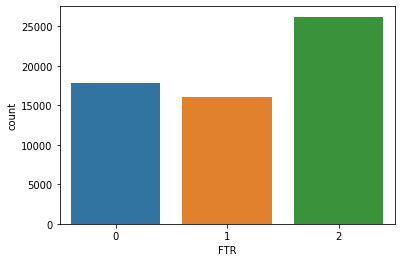

In [ ]:
sns.countplot(data['FTR'])

In [ ]:
data["is_month_end"] = data.Date.dt.is_month_end.astype(int)
data["is_month_start"] = data.Date.dt.is_month_start.astype(int)

In [ ]:
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month
data['Quarter'] = data.Date.dt.quarter
data['day'] = data.Date.dt.day
data['year_month'] = data['Year'].apply(str) + "_"  + data['Month'].apply(str)
data['year_month_int'], _ = pd.factorize(data['year_month'])

In [ ]:
data.drop(['Date','HomeTeam','AwayTeam','HTR','HTR','FTHG','FTAG','HTHG','HTAG'], axis=1, inplace=True)


In [ ]:
data

,FTR,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA,VCH,VCD,VCA,MaxH,MaxD,MaxA,AvgH,AvgD,AvgA,MaxOv2.5,MaxUn2.5,AvgOv2.5,AvgUn2.5,MaxAHH,MaxAHA,AvgAHH,AvgAHA,Year,Month,day,home_standev,home_var,away_standev,away_var,draw_standev,draw_var,is_month_end,is_month_start,Quarter,year_month,year_month_int
0,0,1.50,3.8,2.00,1.50,3.00,2.00,1.53,3.00,2.00,1.53,3.15,2.06,1.50,3.00,2.00,1.530000,4.000000,2.050000,1.59,3.24,2.10,1.52,3.07,2.01,2.00,1.99,1.91,1.87,2.02,1.97,1.94,1.89,2020,8,8,0.029761,0.000886,0.038079,0.001450,0.171277,0.029336,0,0,3,2020_8,0
1,1,1.30,3.1,2.00,1.30,3.00,2.00,1.33,3.00,2.00,1.32,3.15,2.06,1.29,3.00,2.00,2.611007,3.886275,3.795705,1.37,3.24,2.10,1.31,3.07,2.01,1.78,1.64,1.68,1.57,1.83,1.90,1.99,1.84,2020,8,8,0.023905,0.000571,0.038079,0.001450,0.071913,0.005171,0,0,3,2020_8,0
2,2,1.40,3.1,2.00,1.40,3.00,2.00,1.43,3.00,2.00,1.43,3.15,2.06,1.40,3.00,2.00,1.440000,3.100000,2.050000,1.50,3.24,2.10,1.43,3.07,2.01,1.78,1.64,1.69,1.57,2.06,1.90,1.98,1.85,2020,8,8,0.033139,0.001098,0.038079,0.001450,0.071913,0.005171,0,0,3,2020_8,0
3,2,1.50,3.8,1.65,1.50,3.00,1.67,1.50,3.00,1.70,1.53,3.15,1.72,1.52,3.00,1.70,2.611007,3.886275,3.795705,1.57,3.24,1.76,1.51,3.07,1.70,1.57,1.64,1.54,1.57,1.97,1.97,1.93,1.89,2020,9,8,0.023905,0.000571,0.038079,0.001450,0.071913,0.005171,0,0,3,2020_9,1
4,0,1.50,3.6,1.90,1.50,3.75,1.87,1.50,3.65,1.95,1.53,3.91,1.97,1.52,3.00,1.91,2.611007,3.886275,3.795705,1.57,3.24,2.01,1.51,3.79,1.93,1.53,1.64,1.49,1.57,1.97,1.98,1.89,1.92,2020,9,8,0.023905,0.000571,0.038079,0.001450,0.185282,0.034329,0,0,3,2020_9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60068,0,2.80,3.3,2.25,2.85,3.50,2.30,1.50,3.35,2.45,2.88,3.43,2.54,2.75,3.25,2.45,2.880000,3.300000,2.500000,2.93,3.56,2.56,2.83,3.36,2.44,1.95,2.08,1.88,1.93,1.83,1.85,1.77,1.79,2021,12,9,0.054756,0.002998,0.109406,0.011970,0.107096,0.011470,0,0,4,2021_12,16
60069,2,2.55,3.2,2.62,2.65,3.20,2.65,2.65,3.30,2.65,2.70,3.36,2.78,2.62,3.10,2.62,2.630000,3.250000,2.750000,2.73,3.42,2.80,2.62,3.25,2.69,2.12,1.92,2.04,1.78,1.96,2.01,1.90,1.94,2021,12,9,0.054494,0.002970,0.072309,0.005229,0.100143,0.010029,0,0,4,2021_12,16
60070,1,2.20,3.4,3.00,2.45,3.40,2.70,2.35,3.45,2.90,2.41,3.57,3.02,2.35,3.40,2.80,2.380000,3.400000,2.900000,2.45,3.66,3.08,2.37,3.42,2.89,1.91,2.11,1.79,2.03,2.09,1.90,2.04,1.81,2021,12,9,0.079462,0.006314,0.122991,0.015127,0.098670,0.009736,0,0,4,2021_12,16
60071,2,1.90,3.4,3.60,1.95,3.40,3.75,2.05,3.50,3.60,2.04,3.58,3.77,2.00,3.40,3.50,2.000000,3.500000,3.600000,2.13,3.68,3.83,2.03,3.48,3.56,1.95,2.00,1.89,1.91,1.83,1.88,2.04,1.82,2021,9,13,0.068817,0.004736,0.116427,0.013555,0.099103,0.009821,0,0,3,2021_9,13


In [ ]:
poly_feature_1 = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD',
                 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA']
poly_feature_2 = ['MaxH', 'MaxD', 'MaxA', 'MaxOv2.5', 'MaxUn2.5','MaxAHH', 'MaxAHA']
poly_feature_3 = ['AvgH', 'AvgD', 'AvgA','AvgOv2.5', 'AvgUn2.5','AvgAHH', 'AvgAHA',]
poly_feature_4 = ['home_standev', 'home_var', 'away_standev', 'away_var','draw_standev', 'draw_var']
poly_feature_5 = ['Year','Month','Quarter','day','year_month_int','is_month_end','is_month_start']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

poly1 = poly.fit_transform(data[poly_feature_1])
poly2 = poly.fit_transform(data[poly_feature_2])
poly3 = poly.fit_transform(data[poly_feature_3])
poly4 = poly.fit_transform(data[poly_feature_4])
poly5 = poly.fit_transform(data[poly_feature_5])

In [ ]:
df_poly1 = pd.DataFrame(poly1, columns=[f"poly1_{i}"for i in range(poly1.shape[1])])
df_poly2 = pd.DataFrame(poly2, columns=[f"poly2_{i}"for i in range(poly2.shape[1])])
df_poly3 = pd.DataFrame(poly3, columns=[f"poly3_{i}"for i in range(poly3.shape[1])])
df_poly4 = pd.DataFrame(poly4, columns=[f"poly4_{i}"for i in range(poly4.shape[1])])
df_poly5 = pd.DataFrame(poly5, columns=[f"poly5_{i}"for i in range(poly5.shape[1])])

In [ ]:
new_data = pd.concat([data,df_poly1], axis=1)

In [ ]:
new_data1 = pd.concat([new_data,df_poly2], axis=1)

In [ ]:
new_data2 = pd.concat([new_data1,df_poly3], axis=1)

In [ ]:
new_data = pd.concat([new_data2,df_poly4], axis=1)

In [ ]:
new_data = pd.concat([new_data, df_poly5], axis=1)

In [ ]:
new_data.columns

Index(['FTR', 'B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD',
       'IWA',
       ...
       'poly5_18', 'poly5_19', 'poly5_20', 'poly5_21', 'poly5_22', 'poly5_23',
       'poly5_24', 'poly5_25', 'poly5_26', 'poly5_27'],
      dtype='object', length=323)

In [ ]:
features = new_data.select_dtypes(include = 'number').columns.drop('FTR')
features1 = data.select_dtypes(include = 'number').columns.drop('FTR')

In [ ]:
train = new_data.iloc[:int(0.8*data.shape[0])]

test = new_data.iloc[int(0.8*data.shape[0]):]

In [ ]:
train1 = data.iloc[:int(0.8*data.shape[0])]

test1 = data.iloc[int(0.8*data.shape[0]):]

In [ ]:
X = train[features]
y = train.iloc[:,0]

In [ ]:
for i in X.columns:
  X[f'Log_{i}'] = (X[i]+1).transform(np.log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X1 = train1[features1]
y1 = train1.iloc[:,0]

In [ ]:
for i in X1.columns:
  X1[f'Log_{i}'] = (X1[i]+1).transform(np.log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Standardizing The Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X = sc.fit_transform(X)
#Standardizing has no effect on the data

In [ ]:
#Standardizing The Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Scaled_X1 = sc.fit_transform(X1)
#Standardizing has no effect on the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Scaled_X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
#from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
sm = RandomOverSampler(random_state=42)
X_, y_ = sm.fit_resample(X_train, y_train)

In [ ]:
from imblearn.combine import SMOTEENN
sample = SMOTEENN()
# fit and apply the transform
X_over, y_over = sample.fit_resample(X_train, y_train)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Scaled_X1, y1, test_size=0.2, random_state=42,stratify=y1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler 
sm = RandomOverSampler(random_state=42)
X_1, y_1 = sm.fit_resample(X_train1, y_train1)

In [ ]:
from imblearn.combine import SMOTEENN
sample = SMOTEENN()
# fit and apply the transform
X_over1, y_over1 = sample.fit_resample(X_train1, y_train1)

In [ ]:
#X_train2, X_test2, y_train2, y_test2 = train_test_split(Scaled_X, y, test_size=0.2, random_state=42,stratify=y)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes = [0,1,2],
    y = y_train2
)
classes_weights

array([1.11041793, 1.24808466, 0.77029112])

In [ ]:
def CreateBalancedSampleWeights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    class_weight_dict[classes[1]] = class_weight_dict[classes[1]] * largest_class_weight_coef
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights

largest_class_weight_coef = max(y_train2.value_counts().values)/y_train2.shape[0]
    
#pass y_train as numpy array
weight = CreateBalancedSampleWeights(y_train2, largest_class_weight_coef)

In [ ]:
weight

[1.1104179302775612,
 0.7702911181903789,
 1.1104179302775612,
 1.1104179302775612,
 0.5400921958187249,
 0.5400921958187249,
 1.1104179302775612,
 1.1104179302775612,
 0.7702911181903789,
 0.7702911181903789,
 0.5400921958187249,
 1.1104179302775612,
 1.1104179302775612,
 1.1104179302775612,
 0.7702911181903789,
 0.7702911181903789,
 0.7702911181903789,
 0.7702911181903789,
 1.1104179302775612,
 0.7702911181903789,
 1.1104179302775612,
 0.5400921958187249,
 0.7702911181903789,
 0.7702911181903789,
 0.5400921958187249,
 1.1104179302775612,
 0.7702911181903789,
 0.5400921958187249,
 0.5400921958187249,
 1.1104179302775612,
 1.1104179302775612,
 0.7702911181903789,
 0.5400921958187249,
 1.1104179302775612,
 0.7702911181903789,
 0.7702911181903789,
 0.7702911181903789,
 0.7702911181903789,
 0.7702911181903789,
 0.5400921958187249,
 0.7702911181903789,
 1.1104179302775612,
 0.7702911181903789,
 0.7702911181903789,
 0.7702911181903789,
 0.5400921958187249,
 1.1104179302775612,
 0.5400921958

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_over, y_over)
prediction = model_xgb.predict(X_test)

print(f1_score(prediction, y_test, average='macro'))

0.41818410114894183


XGB Classifier with unscaled data with polynomial features
0.5174565301827437

XGB Classifier with scaled data with polynomial features
0.5054916482941431

XGB Classifier with RandomSmoteSampling with scaled data with polynomial features 0.46410212741382767

XGB Classifier with RandomSmoteSampling with scaled data with polynomial features with 100 features 0.46557950753351945

XGB Classifier with RandomSmoteSampling in train_test_split with scaled data with polynomial features 0.4536514086133356

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_over1, y_over1)
prediction = model_xgb.predict(X_test1)

print(f1_score(prediction, y_test1, average='macro'))

0.4195842616497653


XGB Classifier with unscaled data without polynomial features
0.5167938717679408

XGB Classifier with scaled data without polynomial features
0.5055265861429057

XGB Classifier with RandomSmoteSampling with scaled data without polynomial features 0.46233422590032686

XGB Classifier with RandomSmoteSampling in train_test_split with scaled data without polynomial features 0.45506104591264335

In [ ]:
model_ltb = ltb.LGBMClassifier()
model_ltb.fit(X_over, y_over)
prediction = model_ltb.predict(X_test)

print(f1_score(prediction, y_test, average='macro'))

0.4189636757815032


LTB Classifier with unscaled data with polynomial features 
0.5365023649206154

LTB Classifier with scaled data with polynomial features
0.5369698937240855

LTB Classifier with RandomSmoteSampling with scaled data with polynomial features 0.5035252605750623

LTB Classifier with RandomSmoteSampling in train_test_split with scaled data with polynomial features 0.4479388541942158

In [ ]:
model_ltb = ltb.LGBMClassifier()
model_ltb.fit(X_over1, y_over1)
prediction = model_ltb.predict(X_test1)

print(f1_score(prediction, y_test1, average='macro'))

0.30227145526999527


LTB Classifier with unscaled data without polynomial features 
0.5384212077087581

LTB CLassifier with scaled data without polynomial features
0.5231638039281893

LTB Classifier with RandomSmoteSampling with scaled data without polynomial features 0.48689742150068177

LTB Classifier with RandomSmoteSampling in train_test_split with scaled data without polynomial features 0.4506663405132782

In [ ]:
model_rfc = RandomForestClassifier(class_weight='balanced')
model_rfc.fit(X_train,y_train)
prediction = model_rfc.predict(X_test)

print(f1_score(prediction, y_test, average='macro'))

0.41723949423421525


RandomForestClassifier with unscaled data with polynomial features 0.5798520335871779

RandomForestClassifier with scaled data with polynomial features 0.6468171759077922

RandomForestClassifier with RandomSMOTESampling scaled data with polynomial features 0.6792769860446457

RandomForestClassifier with RandomSmoteSampling in train_test_split with scaled data with polynomial features 0.43438379485748285

In [ ]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_1,y_1)
prediction = model_rfc.predict(X_test1)

print(f1_score(prediction, y_test1, average='macro'))

0.2985464791723604


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


RandomForestClassifier with unscaled data without polynomial features 
0.5906631865117259

RandomForestClassifier with scaled data without polynomial features 0.6358335601346544

RandomForestClassifier with RandomSMOTESampling scaled data without polynomial features 0.6774895102606676

RandomForestClassifier with RandomSmoteSampling in train_test_split with scaled data without polynomial features 0.43993455153236444

In [ ]:
model_bc = BaggingClassifier(base_estimator = model_rfc)
model_bc.fit(X_train,y_train)
prediction = model_bc.predict(X_test)

print(f1_score(prediction, y_test, average='macro'))

0.4486131486976765


Bagging Classifier with scaled data without polynomial features 0.5803651984160404

Bagging Classifier with scaled data with polynomial features 0.6370693183199364

Bagging Classifier with RandomSMOTESAMPLING with scaled data with polynomial features 
0.675361026420677

Bagging Classifier with RandomSMOTESAMPLING with scaled data without polynomial features 
0.6742277586589861

Bagging Classifier with RandomSmoteSampling in train_test_split with scaled data with polynomial features 0.4486131486976765

In [ ]:
model_cbc = ctb.CatBoostClassifier()
model_cbc.fit(X_train,y_train)
prediction = model_cbc.predict(X_test)

print(f1_score(prediction, y_test, average='macro'))

Learning rate set to 0.09659
0:	learn: 1.0876722	total: 599ms	remaining: 9m 58s
1:	learn: 1.0786712	total: 954ms	remaining: 7m 55s
2:	learn: 1.0715717	total: 1.31s	remaining: 7m 16s
3:	learn: 1.0661133	total: 1.67s	remaining: 6m 54s
4:	learn: 1.0612648	total: 1.99s	remaining: 6m 35s
5:	learn: 1.0578088	total: 2.3s	remaining: 6m 21s
6:	learn: 1.0543122	total: 2.65s	remaining: 6m 15s
7:	learn: 1.0516582	total: 3s	remaining: 6m 12s
8:	learn: 1.0492641	total: 3.37s	remaining: 6m 11s
9:	learn: 1.0469514	total: 3.7s	remaining: 6m 6s
10:	learn: 1.0447890	total: 4.07s	remaining: 6m 5s
11:	learn: 1.0429335	total: 4.45s	remaining: 6m 6s
12:	learn: 1.0413433	total: 4.8s	remaining: 6m 4s
13:	learn: 1.0400482	total: 5.14s	remaining: 6m 2s
14:	learn: 1.0391376	total: 5.46s	remaining: 5m 58s
15:	learn: 1.0380826	total: 5.83s	remaining: 5m 58s
16:	learn: 1.0371514	total: 6.19s	remaining: 5m 57s
17:	learn: 1.0365106	total: 6.54s	remaining: 5m 56s
18:	learn: 1.0359520	total: 6.88s	remaining: 5m 55s
19:	

In [ ]:

model_BN = KNeighborsClassifier(n_neighbors=3)
model_BN.fit(X_train,y_train)
prediction = model_BN.predict(X_test)

print(f1_score(prediction, y_test, average='macro'))

0.3859313883711379


KNeighborsClassifier with unscaled data with polynomial features 0.5250249043821201

KNeighborsClassifier with scaled data with polynomial features 0.5696967560064748

KNeighborsClassifier with RandomSMOTESampling with scaled data with polynomial features 0.5037778383891123

KNeighborsClassifier with RandomSMOTESampling with scaled data without polynomial features 0.49872979987208166

KNeighborsClassifier with RandomSMOTESampling in Train Test split  with scaled data with polynomial features 0.3859313883711379

In [ ]:
model_rfc11 = RandomForestClassifier()
model_rfc11.fit(X_train2,y_train2)

RandomForestClassifier()

In [ ]:
feature_importance_df = pd.DataFrame(model_rfc11.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = X.columns

#plt.figure(figsize=(20, 12));
#sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(100))
#plt.title('Model features importance:')

In [ ]:
new_feat = feature_importance_df.sort_values(by = ['importance'], ascending = False).head(100)['feature'].to_list()

In [ ]:
from collections import Counter
print(Counter(y))
print(Counter(y_))

Counter({2: 26236, 0: 17807, 1: 16030})
Counter({0: 26236, 1: 26236, 2: 26236})


In [ ]:
oof_f1=[]



fold=StratifiedKFold(n_splits=5)#15#5#10

i=1
for train_index, test_index in fold.split(X_res,y_res):
        
    X_train, X_test = X_res[train_index], X_res[test_index]
    y_train, y_test = y_res[train_index], y_res[test_index]

    model = ltb.LGBMClassifier(**params, n_estimators=1000)

    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=300, verbose = False)#erly100
    preds=model.predict(X_test)

    print(f"F1, fold {i}: {f1_score(y_test,preds,average='macro')}")
    i+=1                
    oof_f1.append(f1_score(y_test,preds,average='macro'))
    

print(np.mean(oof_f1))

F1, fold 1: 0.4010994052203311
F1, fold 2: 0.3331628175657059
F1, fold 3: 0.39592396609140196
F1, fold 4: 0.6887319543791568
F1, fold 5: 0.7019573810662522
0.5041751048645696


In [ ]:
oof_f1=[]
oof_predictions=[]



fold=StratifiedKFold(n_splits=5)#15#5#10

i=1
for train_index, test_index in fold.split(X_res,y_res):
        
    X_train, X_test = X_res[train_index], X_res[test_index]
    y_train, y_test = y_res[train_index], y_res[test_index]

    model_rfc = RandomForestClassifier(**params)

    model_rfc.fit(X_train,y_train)#erly100
    preds=model_rfc.predict(X_test)

    print(f"F1, fold {i}: {f1_score(y_test,preds,average='macro')}")
    i+=1                
    oof_f1.append(f1_score(y_test,preds,average='macro'))
    

print(np.mean(oof_f1))

F1, fold 1: 0.5727226964386132
F1, fold 2: 0.39995116868667746
F1, fold 3: 0.47517263686918226


KeyboardInterrupt: ignored

In [ ]:
import optuna

In [ ]:
X = new_train[new_feat]
y = new_train['FTR']

In [ ]:
def objective(trial):
    oof_f1=[]
    oof_predictions=[]


    param = {}
    param['n_estimators'] = trial.suggest_int("n_estimators", 100, 2000, 50)
    param['max_depth'] = trial.suggest_int("max_depth", 1, 100)
    param['criterion'] = trial.suggest_categorical("criterion", ["gini","entropy"])
    param['min_samples_split'] = trial.suggest_int("min_samples_split", 1, 10, 1)
    param['min_samples_leaf'] = trial.suggest_int("min_samples_leaf", 1, 5, 1)
    param['max_features'] = trial.suggest_categorical("max_features", ["auto","sqrt","log2"])
    param['random_state'] = 0
    param['class_weight'] = trial.suggest_categorical("class_weight", ["balanced","balanced_subsample",None])
    #param['bootstrap'] = trial.suggest_categorical("bootstrap", [True,False])
    param['verbose'] = 0




    fold=StratifiedKFold(n_splits=5)#15#5#10
    i=1
    for train_index, test_index in fold.split(X_res,y_res):
        
        X_train, X_test = X_res[train_index], X_res[test_index]
        y_train, y_test = y_res[train_index], y_res[test_index]
        model_rfc = RandomForestClassifier(**param)
    

        model_rfc.fit(X_train,y_train)#erly100
        preds=model_rfc.predict(X_test)

        oof_f1.append(f1_score(y_test,preds,average='macro'))

    return np.mean(oof_f1)

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2021-11-18 05:14:13,872] A new study created in memory with name: no-name-887920cd-310d-4f06-91fe-32d4499fa033


In [ ]:
print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials: 4
Best trial:
  Value: 0.6272473245848953
  Params: 
    n_iterators: 1650
    max_depth: 88
    criterion: gini
    min_samples_split: 6
    min_samples_leaf: 3
    max_features: log2
    bootstrap: False


In [ ]:
trial.params

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 88,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_iterators': 1650}